In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

import os

In [2]:
folder = "example_data"
filenames = os.listdir(folder)
filenames

['HRM6.DigiCam_OD0_1714664731965543_1714664725335000.csv',
 'HRM5.DigiCam_OD0_1714385345562779_1714385338935000.csv',
 'C1--XX_SCOPE2--00081.csv',
 'BG_HRM3.DigiCam_OD0_1714407435191489_1714407428535000.csv',
 'HRM3.DigiCam_OD1_1714604587992043_1714604581335000.csv',
 'HRMT64_timestamps_shots_camerafiles.csv',
 'HRM3.DigiCam_OD0_1714383312791697_1714383306135000.csv',
 'HRM3.DigiCam_OD2_1684845285167029_1684845278535000.csv',
 'HRM4.DigiCam_OD1_1714665814393282_1714665807735000.csv',
 'HRM4.DigiCam_OD1_1714672783992372_1714672777335000.csv',
 'shot_camera_files.csv',
 'BG_HRM4.DigiCam_OD0_1714407435192667_1714407428535000.csv',
 'C1_SCOPE1_00013.txt',
 'shot_file_mapping.csv']

In [3]:
HRM3_filenames = [filename for filename in filenames if "HRM3" in filename]
HRM4_filenames = [filename for filename in filenames if "HRM4" in filename]
HRM5_filenames = [filename for filename in filenames if "HRM5" in filename]
HRM6_filenames = [filename for filename in filenames if "HRM6" in filename]

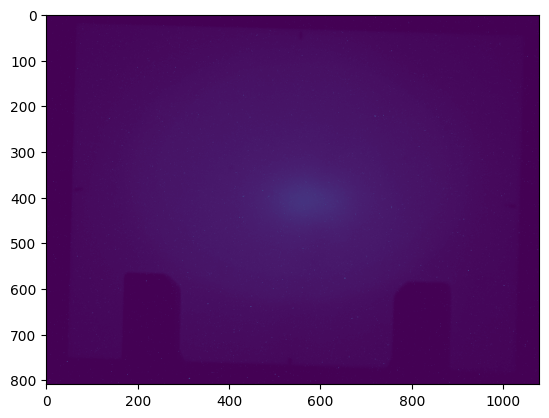

In [4]:
def load_DigiCam_image(folder, filename):
    """
    works for the files that start with:
    'BG_HRM3.DigiCam...' & 'HRM3.DigiCam...'
    'BG_HRM4.DigiCam...' & 'HRM4.DigiCam...'
    'HRM5.DigiCam...'
    'HRM6.DigiCam...'
    """

    # first column and row is coordinate data, which is removed
    image = np.loadtxt(f"{folder}/{filename}", delimiter=",", skiprows=1)
    image = np.delete(image, 0, axis=1)
    return image

# filename = HRM3_filenames[1]
filename = HRM4_filenames[1]

image = load_DigiCam_image(folder, filename)
plt.imshow(image)

In [37]:
def crop_image(image, limits=[None, None]):
    # crop_image = image
    if limits[0] is not None:
        image = image[limits[0][0]:limits[0][1], :]

    if limits[1] is not None:
        image = image[:, limits[1][0]:limits[1][1]]

    return image

def perform_image_lineouts(image, axis=0, limits=[None, None]):
    image = crop_image(image, limits=limits)

    if axis == 0:
        if limits[1] is not None:
            low = limits[1][0]
            high = limits[1][1]
        else:
            low = 0
            high = len(image[0])

    else:
        if limits[0] is not None:
            low = limits[0][0]
            high = limits[0][1]
        else:
            low = 0
            high = len(image[:,0])

    ls = np.arange(low, high, 1)
    return ls, np.sum(image, axis=axis)



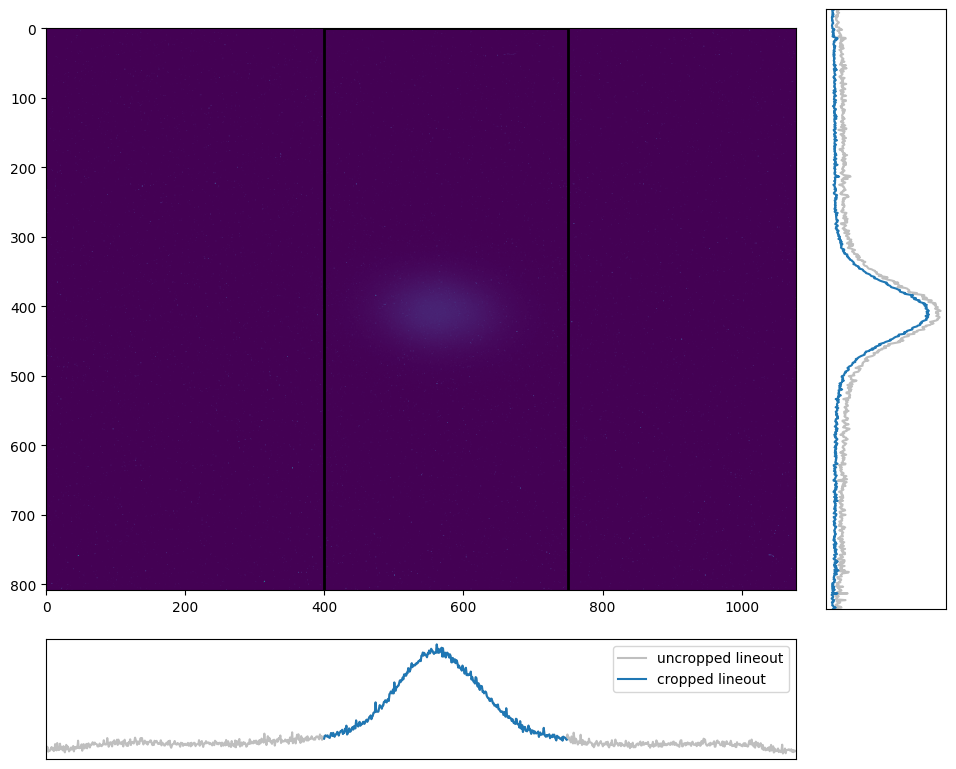

In [99]:
image = load_DigiCam_image(folder, HRM4_filenames[0])



# limits = [[250, 550],[400, 750]]
limits = [None,[400, 750]]
# limits = [[250, 550], None]
# limits = [None, None]



# get lineouts and linspaces for use in fitting and to plotting
hor_xs, lineout_x = perform_image_lineouts(image, axis=0, limits=limits)
vert_xs, lineout_y = perform_image_lineouts(image, axis=1, limits=limits)

# UNCROPPED LINEOUTS JUST FOR NICE PLOTS
uncropped_hor_xs, uncropped_lineout_x = perform_image_lineouts(image, axis=0)
uncropped_vert_xs, uncropped_lineout_y = perform_image_lineouts(image, axis=1)




fig = plt.figure(figsize=(15,15))

# adding subplots to the correct places
# rect = [left, bottom, width, height]
ax1 = fig.add_axes(rect=[0., 0.05, 0.5, 0.5])
ax2 = fig.add_axes(rect=[0., 0., 0.5, 0.08])
ax3 = fig.add_axes(rect=[0.52, 0.1, 0.08, 0.4])


ax1.imshow(image)


# MAKING THE BLACK BOX AROUND THE CROPPED REGION
if limits[0] is not None:
    start_col, end_col = limits[0]  # Swap row and col: start_col, end_col will be limits for rows
else:
    start_col, end_col = 0, len(image[:, 0])  # These are the row limits

if limits[1] is not None:
    start_row, end_row = limits[1]  # Swap row and col: start_row, end_row will be limits for columns
else:
    start_row, end_row = 0, len(image[0])  # These are the column limits
# Calculate the dimensions of the rectangle (x, y, width, height)
rect_height = end_row - start_row  # Width will now be based on rows
rect_width = end_col - start_col  # Height will now be based on columns
rect = patches.Rectangle((start_row, start_col), rect_height, rect_width, linewidth=2, edgecolor='black', facecolor='none')
# Add the rectangle to the plot
ax1.add_patch(rect)



# plot the lineouts
ax2.plot(uncropped_hor_xs, uncropped_lineout_x, color="gray", alpha=0.5, label="uncropped lineout")
ax2.plot(hor_xs, lineout_x, label="cropped lineout")

ax3.plot(uncropped_lineout_y, uncropped_vert_xs[::-1], color="gray", alpha=0.5)
# have to flip it weird bs you cant just reverse the xs
ax3.plot(lineout_y, np.max(uncropped_vert_xs) - vert_xs)


# remove axes from the linouts bc they messy
ax2.set_xticks([]); ax2.set_xticklabels([]); ax2.set_yticks([]); ax2.set_yticklabels([])
ax3.set_xticks([]); ax3.set_xticklabels([]); ax3.set_yticks([]); ax3.set_yticklabels([])

ax2.set_xlim((0, len(image[0])))
ax3.set_ylim((0, len(image[:,0])))
# ax3.set_ylim((len(image[:,0]), 0))

ax2.legend()

plt.show()